# 3. 선형 회귀(Linear Regression)

### Goal
가설(Hypothesis), 손실 함수(Loss Function) 그리고 경사 하강법(Gradient Descent)에 대한 개념과 선형 회귀에 대해서 이해

## 1) 선형 회귀(Linear Regression)
- 선형 회귀는 한 개 이상의 독립 변수 x와 y의 선형 관계
- 독립 변수 x가 1개라면 **단순 선형 회귀**

### 단순 선형 회귀 분석(Simple Linear Regression Analysis)
$y = Wx + b$
- $W$ : 가중지(weight), $b$ : 편향(bias)
- $W$와 $b$를 적절하게 찾아내는 것이 $x$와 $y$의 관계를 적절히 모델링한 것

### 다중 선형 회귀 분석(Multiple Linear Regression Analysis)
$y = W_1x_1 + W_2x_2+\dots+ W_nx_n + b$

## 2) 가설(Hypothesis) 세우기
- 학생의 공부 시간에 따라서 다음과 같은 점수를 얻었다.

|hours(x)|score(y)|
|---|---|
|2|25|
|3|50|
|4|42|
|5|61|

<img src=그림1.png width=400>

$x$ 와 $y$의 관계를 유추하기 위해서 수학적으로 식을 세워보게 되는데 머신 러닝에서는 이러한 식을 **가설(Hypothesis)**이라고 함
- 선형회귀 에서의 가설 : $H(x) = Wx+b$
<img src=W와_b가_다름.png width-400>

$\Longrightarrow$ 선형 회귀는 주어진 데이터로부터 y와 x의 관계를 가장 잘 나타내는 직선을 그리는 일  
$\Longrightarrow$ 적절한 $W$와 $b$를 잘 찾아내는 일

## 3) 비용 함수(Cost function) : 평균 제곱 오차(MSE)
> 비용함수 : 실제값과 예측값에 대한 오차

- 회귀 문제의 경우에는 주로 **평균 제곱 오차(Mean Squared Error, MSE)**가 사용
$cost(W,b) = \frac{1}{n} \sum_{i=1}^{n} \left[y^{(i)} - H(x^{(i)})\right]^2$
- $Cost(W,b)$를 최소가 되게 만드는 $W$와 $b$를 구하는 것이 목표!

## 4) 옵티마이저(Optimizer) : 경사하강법(Gradient Descent)
- 선형 회귀를 포함한 수많은 머신 러닝, 딥 러닝의 학습은 결국 비용 함수를 최소화하는 매개 변수인 $W$와 $b$을 찾기 위한 작업을 수행합니다. 이때 사용되는 알고리즘을 옵티마이저(Optimizer) 또는 최적화 알고리즘
- Example : $b$=0
    - $W$와 $cost(W)$의 관계
<img src=경사하강법.png width=300>
- 기계가 해야할 일은 cost가 가장 최소값을 가지게 하는 W를 찾는 일
- 기계는 임의의 랜덤값 W값을 정한 뒤에, 맨 아래의 볼록한 부분을 향해 점차 W의 값을 수정해나감
- 이를 가능하게 하는 것이 **경사하강법(Gradient Descent)**
<img src=접선의기울기1.png width=300>
- cost가 최소가 되는 지점은 접선의 기울기가 0이 되는 지점
- cost를 최소화하는 $W$를 구하기 위해서 $W$를 업데이트하는 식은 다음과 같음
$W := W - \alpha \frac{\partial}{\partial W}cost(W)$
    - 여기서 $\alpha$는 학습률(learning rate)로 $W$의 값을 변경할 때 얼마나 크게 변경할지를 결정(너무 크게하면 발산해버리고 너무 작게하면 학습속도가 느려져서 적당한 값으로 찾아야 함)

<img src=미분.png width=300>
- 결국 위의 $W$를 업데이트 하는 수식은 접선의 기울기가 음수거나, 양수일 때 모두 접선의 기울기가 0인 방향으로 W의 값을 조정

## 5) 케라스로 구현하는 선형 회귀

In [1]:
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트
import numpy as np # Numpy를 임포트

X=np.array([1,2,3,4,5,6,7,8,9]) # 공부하는 시간
y=np.array([11,22,33,44,53,66,77,87,95]) # 각 공부하는 시간에 맵핑되는 성적

model=Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
sgd=optimizers.SGD(lr=0.01)
# 학습률(learning rate, lr)은 0.01로 합니다.
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
# sgd는 경사 하강법을 의미.
# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.fit(X,y, batch_size=1, epochs=300, shuffle=False)
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 9 samples
Epoch 1/300
9/9 [==============================] - 0s 7ms/sample - loss: 381.8221 - mean_squared_error: 381.8221
Epoch 2/300
9/9 [==============================] - 0s 1ms/sample - loss: 2.2996 - mean_squared_error: 2.2996
Epoch 3/300
9/9 [==============================] - 0s 1ms/sample - loss: 2.2940 - mean_squared_error: 2.2940
Epoch 4/300
9/9 [==============================] - 0s 2ms/sample - loss: 2.2886 - mean_squared_error: 2.2886
Epoch 5/300
9/9 [==============================] - 0s 1ms/sample - loss: 2.2834 - mean_squared_error: 2.2834
Epoch 6/300
9/9 [==============================] - 0s 1ms/sample - loss: 2.2784 - mean_squared_error: 2.2784
Epoch 7/300
9/9 [==============================] - 0s 1ms/sample - loss: 2.2735 - mean_squared_error: 2.2735
Epoch 8/300
9/9 [==============================] - 0s 1ms/sample - loss: 2.2689 - mean_squared_error: 2.2689
Epoch 9/300
9/9 [=======

9/9 [==============================] - 0s 776us/sample - loss: 2.1472 - mean_squared_error: 2.1472
Epoch 144/300
9/9 [==============================] - 0s 997us/sample - loss: 2.1472 - mean_squared_error: 2.1472
Epoch 145/300
9/9 [==============================] - 0s 1ms/sample - loss: 2.1471 - mean_squared_error: 2.1471
Epoch 146/300
9/9 [==============================] - 0s 1ms/sample - loss: 2.1471 - mean_squared_error: 2.1471
Epoch 147/300
9/9 [==============================] - 0s 998us/sample - loss: 2.1471 - mean_squared_error: 2.1471
Epoch 148/300
9/9 [==============================] - 0s 886us/sample - loss: 2.1470 - mean_squared_error: 2.1470
Epoch 149/300
9/9 [==============================] - 0s 997us/sample - loss: 2.1470 - mean_squared_error: 2.1470
Epoch 150/300
9/9 [==============================] - 0s 776us/sample - loss: 2.1470 - mean_squared_error: 2.1470
Epoch 151/300
9/9 [==============================] - 0s 886us/sample - loss: 2.1469 - mean_squared_error: 2.1469
E

9/9 [==============================] - 0s 997us/sample - loss: 2.1461 - mean_squared_error: 2.1461
Epoch 217/300
9/9 [==============================] - 0s 776us/sample - loss: 2.1461 - mean_squared_error: 2.1461
Epoch 218/300
9/9 [==============================] - 0s 996us/sample - loss: 2.1461 - mean_squared_error: 2.1461
Epoch 219/300
9/9 [==============================] - 0s 997us/sample - loss: 2.1461 - mean_squared_error: 2.1461
Epoch 220/300
9/9 [==============================] - 0s 1ms/sample - loss: 2.1461 - mean_squared_error: 2.1461
Epoch 221/300
9/9 [==============================] - 0s 1ms/sample - loss: 2.1461 - mean_squared_error: 2.1461
Epoch 222/300
9/9 [==============================] - 0s 1ms/sample - loss: 2.1461 - mean_squared_error: 2.1461
Epoch 223/300
9/9 [==============================] - 0s 1ms/sample - loss: 2.1461 - mean_squared_error: 2.1461
Epoch 224/300
9/9 [==============================] - 0s 1ms/sample - loss: 2.1461 - mean_squared_error: 2.1461
Epoch 2

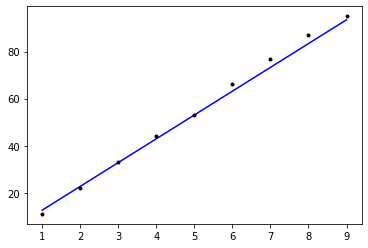

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

In [3]:
print(model.predict([9.5]))

[[98.556465]]
